In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/var/folders/vt/gfx6vx294qv32f8qzc061r5h0000gn/T/ipykernel_71593/799421368.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
df = pd.read_csv('daily_temperatures.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Temperature
Date,
2020-01-01,10.993428
2020-01-02,9.906110
2020-01-03,11.660593
2020-01-04,13.593731
2020-01-05,10.261637


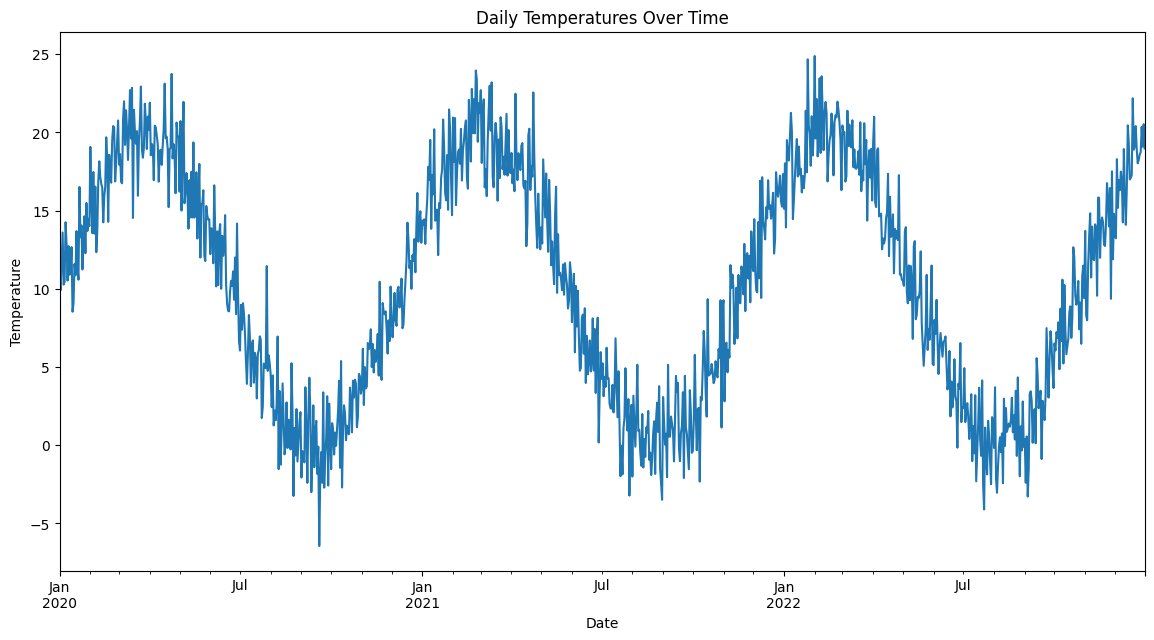

In [8]:
# Plot the temperature over time
df['Temperature'].plot(figsize=(14, 7))
plt.title('Daily Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


In [9]:
# Example: Create a 'lag_1' feature representing the previous day's temperature
df['lag_1'] = df['Temperature'].shift(1)

# Drop the first row since it now contains a NaN value
df = df.dropna()

# Define features and target variable
X = df[['lag_1']]
y = df['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
predictions = model.predict(X_test)

Mean Squared Error: 8.596405425105898


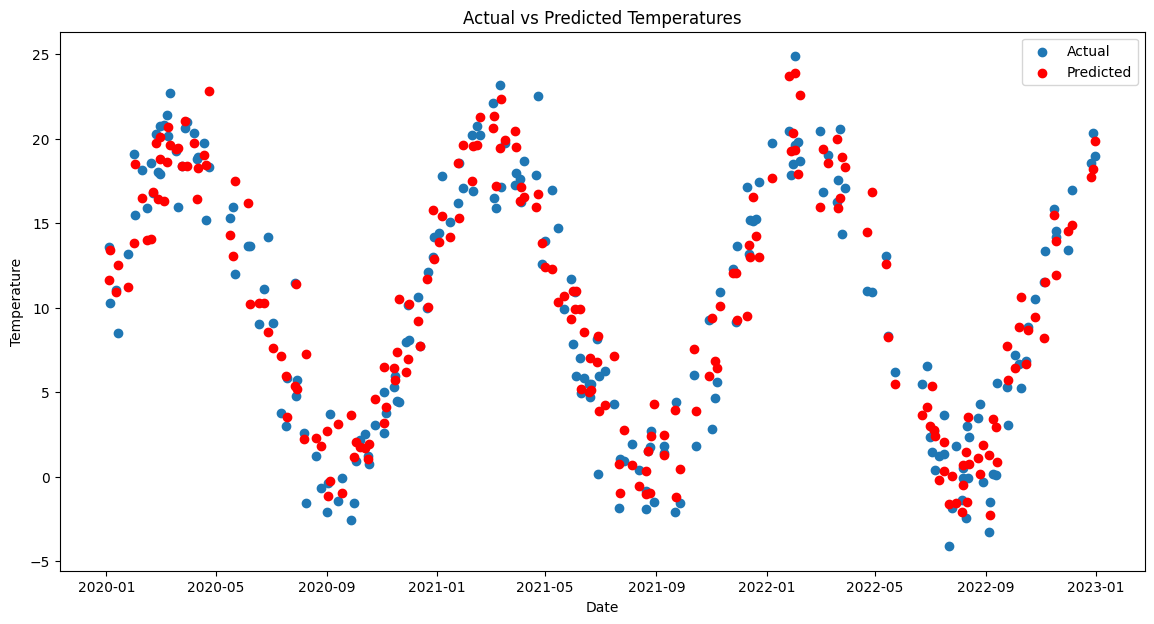

In [12]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted temperatures
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test, label='Actual')
plt.scatter(y_test.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()
